### Car Price Regression Model Analysis.

### This is a car price data set downloaded from Kaggle. The main goal of this important project is a develop a regression model that can accurately predict car prices.

### And the end result was satisfying.

### Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data collection and Analysis

In [2]:
# Loading the dataset to pandas dataframe

Car_data = pd.read_csv("C:\\Users\\LENOVO USER\\Downloads\\automobile_data.csv")

In [3]:
# Let's preview the first rows of the dataset

Car_data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


In [4]:
# Let's preview the last rows of the dataset

Car_data.tail()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
198,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,9.5,114,23,28,16845
199,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,8.7,160,19,25,19045
200,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,8.8,134,18,23,21485
201,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,23.0,106,26,27,22470
202,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,9.5,114,19,25,22625


In [5]:
# Let's preview the number of rows and columns

Car_data.shape

(203, 20)

In [6]:
# Let's check the information about the dataset

Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               203 non-null    object 
 1   fuel_type          203 non-null    object 
 2   num_of_doors       201 non-null    object 
 3   body_style         203 non-null    object 
 4   drive_wheels       203 non-null    object 
 5   engine_location    203 non-null    object 
 6   wheel_base         203 non-null    float64
 7   length             203 non-null    float64
 8   width              203 non-null    float64
 9   height             203 non-null    float64
 10  curb_weight        203 non-null    int64  
 11  engine_type        203 non-null    object 
 12  num_of_cylinders   203 non-null    object 
 13  engine_size        203 non-null    int64  
 14  fuel_system        203 non-null    object 
 15  compression_ratio  203 non-null    float64
 16  horsepower         203 non

In [7]:
# Let's convert datatype to float in the column 'price'

Car_data['price'] = Car_data['price'].astype('float')

In [8]:
# Let's check if the datatype of the column 'price' was successfully converted

Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               203 non-null    object 
 1   fuel_type          203 non-null    object 
 2   num_of_doors       201 non-null    object 
 3   body_style         203 non-null    object 
 4   drive_wheels       203 non-null    object 
 5   engine_location    203 non-null    object 
 6   wheel_base         203 non-null    float64
 7   length             203 non-null    float64
 8   width              203 non-null    float64
 9   height             203 non-null    float64
 10  curb_weight        203 non-null    int64  
 11  engine_type        203 non-null    object 
 12  num_of_cylinders   203 non-null    object 
 13  engine_size        203 non-null    int64  
 14  fuel_system        203 non-null    object 
 15  compression_ratio  203 non-null    float64
 16  horsepower         203 non

In [9]:
# Let's view the first five rows to see the changes made in our dataset

Car_data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495.0
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500.0
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500.0
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950.0
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450.0


In [10]:
# Also let's view the first five rows in our dataset

Car_data.tail()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
198,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,9.5,114,23,28,16845.0
199,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,8.7,160,19,25,19045.0
200,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,8.8,134,18,23,21485.0
201,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,23.0,106,26,27,22470.0
202,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,9.5,114,19,25,22625.0


### Categorical Features

### make
### fuel_type
### num_of_doors
### body_style
### drive_wheels
### engine_location
### engine_type
### num_of_cylinders
### fuel_system

In [11]:
# Let's check the number of missing values in each column

Car_data.isnull().sum()

make                 0
fuel_type            0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
# Let's drop the missing values in the dataset

Car_data = Car_data.dropna()

In [13]:
# Let's check if there's still missing values in the dataset

Car_data.isnull().sum()

make                 0
fuel_type            0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [14]:
# Let's check if there's any duplicates in the dataset

print(Car_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
198    False
199    False
200    False
201    False
202    False
Length: 201, dtype: bool


In [15]:
# Let's view the list of the columns in our dataset

Car_data.columns

Index(['make', 'fuel_type', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'compression_ratio', 'horsepower', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

### Data Analysis

In [16]:
# Let's get the statistical measures of the dataset

Car_data.describe()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.807960,174.063184,65.908955,53.740299,2558.298507,127.024876,10.405572,104.467662,25.194030,30.696517,13015.373134
std,6.065141,12.388068,2.160051,2.441827,525.115435,42.002671,5.752913,39.809926,6.558747,6.908867,8144.871749
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7609.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,9.000000,95.000000,24.000000,30.000000,10245.000000
75%,102.400000,183.500000,66.900000,55.500000,2952.000000,145.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,70.000000,288.000000,49.000000,54.000000,45400.000000


### Numerical Features

In [17]:
sns.set()

<Figure size 432x432 with 0 Axes>

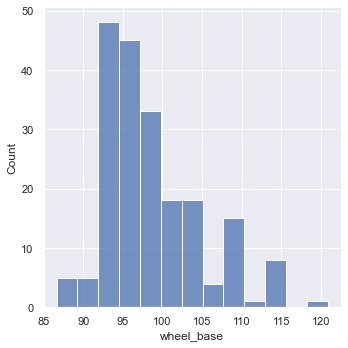

In [18]:
# Let's make a plot for wheel_base distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['wheel_base'])
plt.show()

<Figure size 432x432 with 0 Axes>

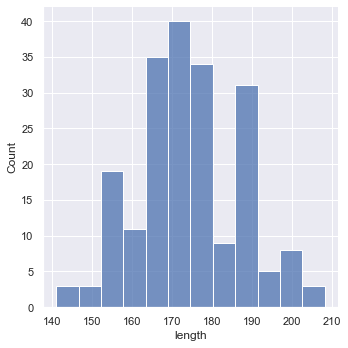

In [19]:
# Let's make a plot for length distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['length'])
plt.show()

<Figure size 432x432 with 0 Axes>

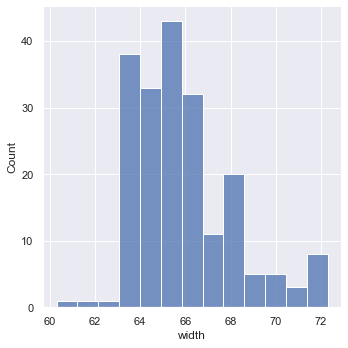

In [20]:
# Let's make a plot for width distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['width'])
plt.show()

<Figure size 432x432 with 0 Axes>

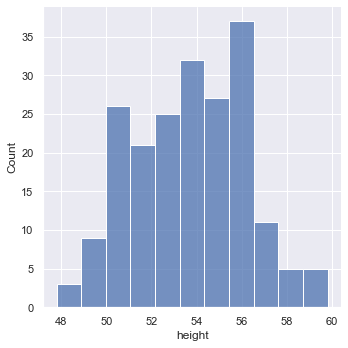

In [21]:
# Let's make a plot for height distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['height'])
plt.show()

<Figure size 432x432 with 0 Axes>

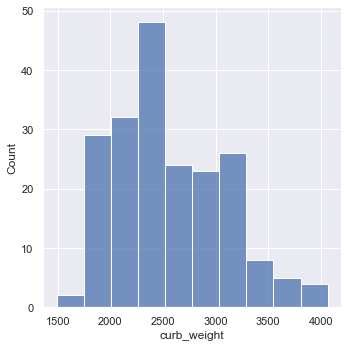

In [22]:
# Let's make a plot for curb weight distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['curb_weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

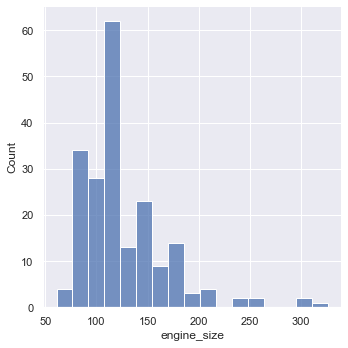

In [23]:
# Let's make a plot for engine_size distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['engine_size'])
plt.show()

<Figure size 432x432 with 0 Axes>

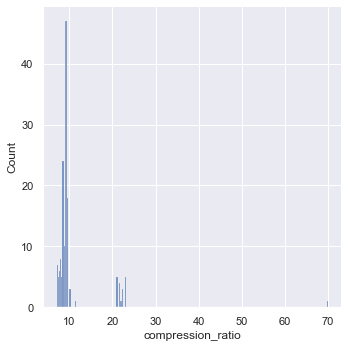

In [24]:
# Let's make a plot for compression_ratio distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['compression_ratio'])
plt.show()

<Figure size 432x432 with 0 Axes>

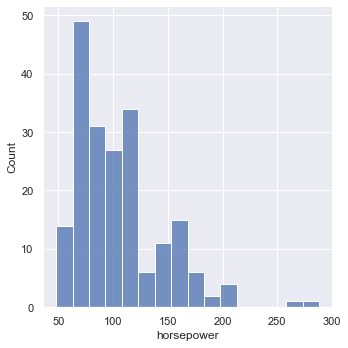

In [25]:
# Let's make a plot for horsepower distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['horsepower'])
plt.show()

<Figure size 432x432 with 0 Axes>

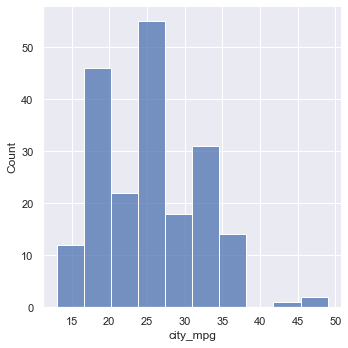

In [26]:
# Let's make a plot for city_mpg distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['city_mpg'])
plt.show()

<Figure size 432x432 with 0 Axes>

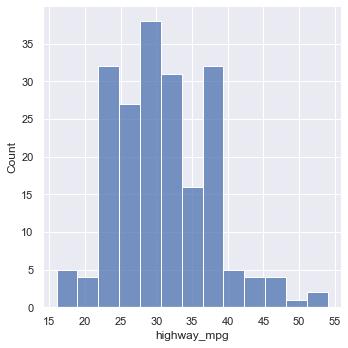

In [27]:
# Let's make a plot for highway_mpg distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['highway_mpg'])
plt.show()

<Figure size 432x432 with 0 Axes>

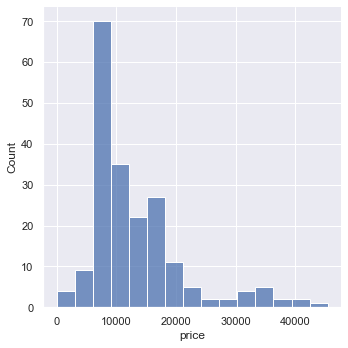

In [28]:
# Let's make a plot for price distribution

plt.figure(figsize = (6,6))
sns.displot(Car_data['price'])
plt.show()

### Categorical Features

In [29]:
# Let's view our dataset again to see the categorical features that will be visualized

Car_data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495.0
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500.0
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500.0
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950.0
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450.0


In [30]:
# Let's see the values in the make column

Car_data['make'].value_counts()

toyota           32
nissan           18
mazda            16
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
mercedes-benz     8
dodge             8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
mercury           1
Name: make, dtype: int64

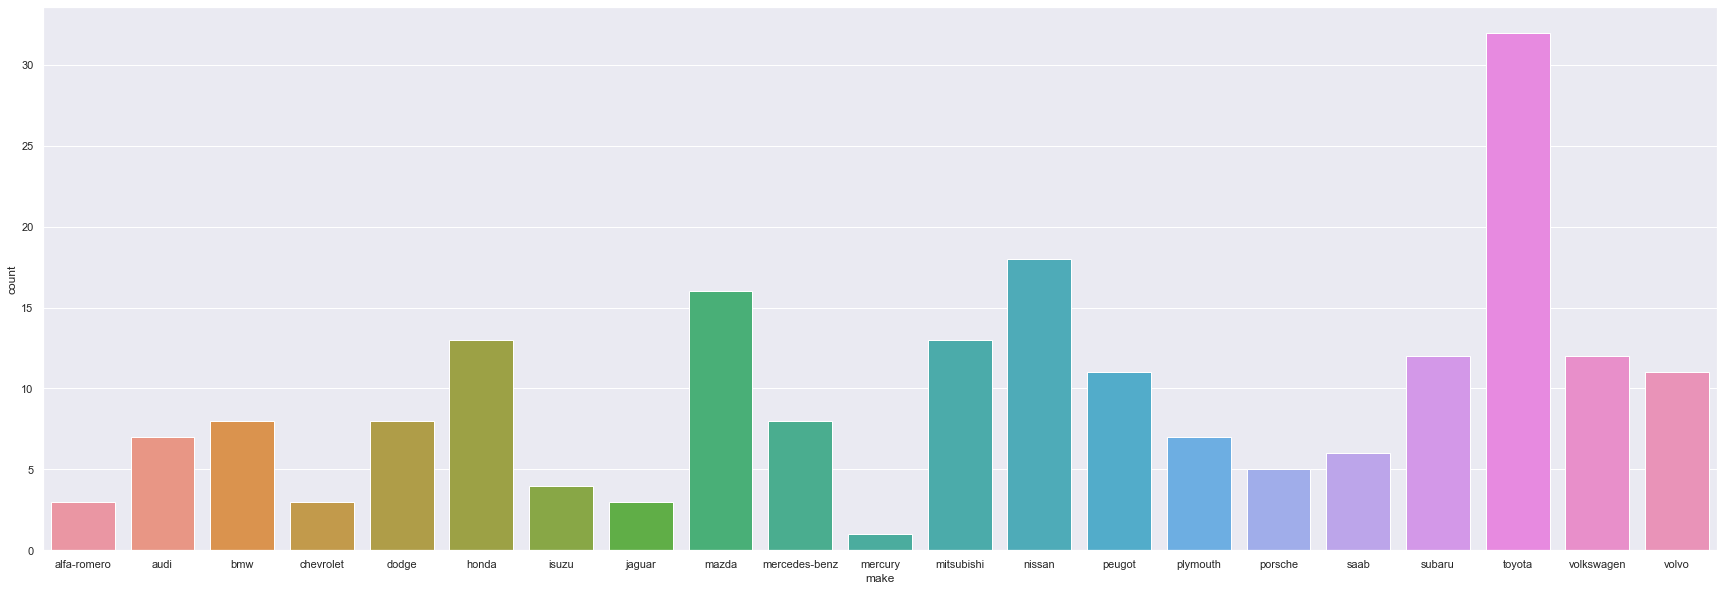

In [31]:
# Let's now visualize the make column

plt.figure(figsize = (30,10))
sns.countplot(x = 'make', data = Car_data)
plt.show()

### From this chart, we can see that Toyota is the most occuring car make, followed by nissan and mazda.

In [32]:
# Let's see the values in the fuel_type column

Car_data['fuel_type'].value_counts()

gas       182
diesel     19
Name: fuel_type, dtype: int64

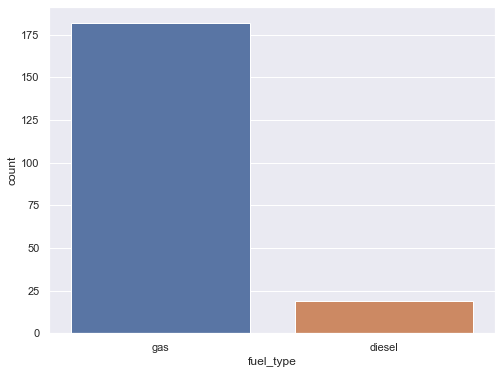

In [33]:
# Let's now visualize the fuel_type column

plt.figure(figsize = (8,6))
sns.countplot(x = 'fuel_type', data = Car_data)
plt.show()

### Gas is the most occuring fuel_type from this chart.

In [34]:
# Let's see the values in the num_of_doors column

Car_data['num_of_doors'].value_counts()

four    113
two      88
Name: num_of_doors, dtype: int64

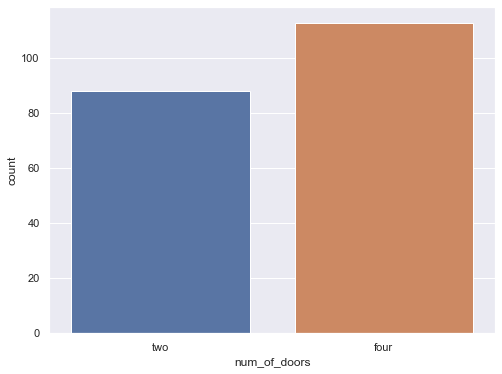

In [35]:
# Let's now visualize the num_of_doors column

plt.figure(figsize = (8,6))
sns.countplot(x = 'num_of_doors', data = Car_data)
plt.show()

### From the chart, the most occurring num_of_doors is four.

In [37]:
# Let's see the values in the body_style column

Car_data['body_style'].value_counts()

sedan          94
hatchback      69
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

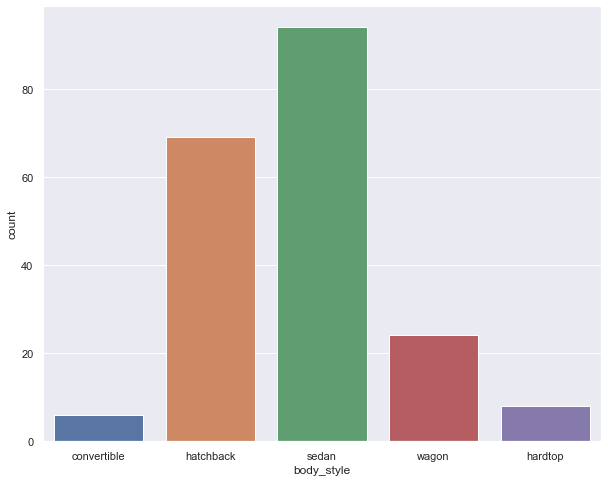

In [38]:
# Let's now visualize the body_style column

plt.figure(figsize = (10,8))
sns.countplot(x = 'body_style', data = Car_data)
plt.show()

### Sedan is the most occuring body_style in this chart. Followed by hatchback and wagon.

In [39]:
# Let's see the values in the drive_wheels column

Car_data['drive_wheels'].value_counts()

fwd     116
rwd      76
4wd       5
4wd       4
Name: drive_wheels, dtype: int64

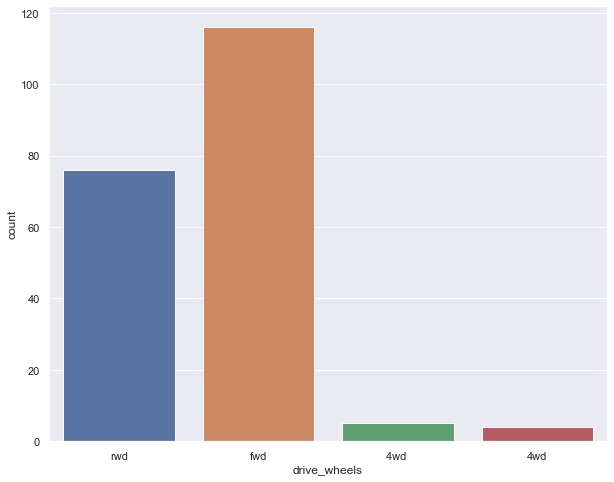

In [40]:
# Let's now visualize drive_wheels column

plt.figure(figsize = (10,8))
sns.countplot(x = 'drive_wheels', data = Car_data)
plt.show()

### From this chart, it is clearly seen that fwd is the most occuring drive_wheels values.

In [41]:
# Let's see the values in the engine_location column

Car_data['engine_location'].value_counts()

front    198
rear       3
Name: engine_location, dtype: int64

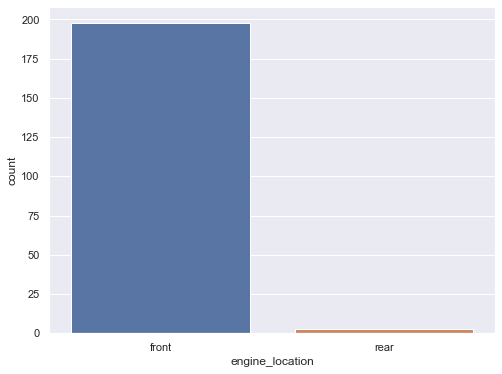

In [42]:
# Let's now visualize engine_location column

plt.figure(figsize = (8,6))
sns.countplot(x = 'engine_location', data = Car_data)
plt.show()

### Front is the most occuring value in the engine_location from this chart.

In [43]:
# Let's see the values in the engine_type column

Car_data['engine_type'].value_counts()

ohc      144
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

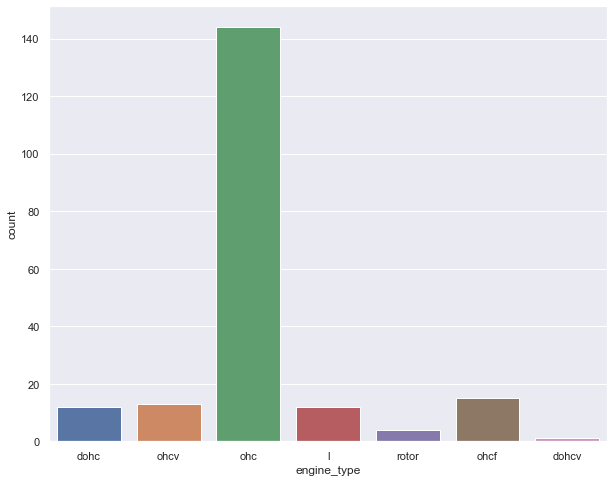

In [44]:
# Let's now visualize engine_type column

plt.figure(figsize = (10,8))
sns.countplot(x = 'engine_type', data = Car_data)
plt.show()

### ohc in the engine_type value is the most occuring in this chart.

In [45]:
# Let's see the values in the num_of_cylinders column

Car_data['num_of_cylinders'].value_counts()

four      155
six        24
five       11
eight       5
two         3
three       1
twelve      1
tow         1
Name: num_of_cylinders, dtype: int64

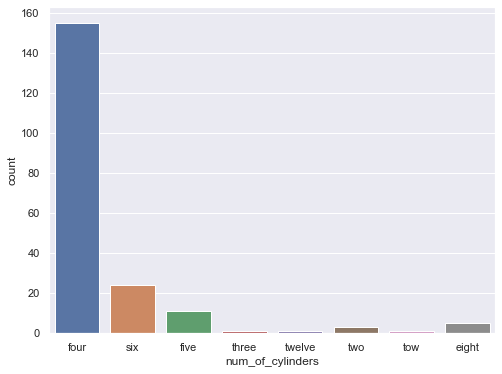

In [46]:
# Let's now visualize num_of_cylinders column

plt.figure(figsize = (8,6))
sns.countplot(x = 'num_of_cylinders', data = Car_data)
plt.show()

### From this chart, we can see that in the num_of_cylinders values 'four' is the most occuring.

In [47]:
# Let's see the values in the fuel_system column

Car_data['fuel_system'].value_counts()

mpfi    91
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

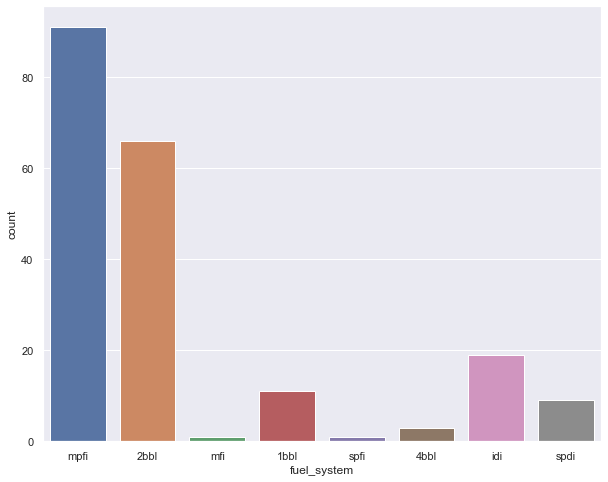

In [48]:
# Let's now visualize the fuel_system column

plt.figure(figsize = (10,8))
sns.countplot(x = 'fuel_system', data = Car_data)
plt.show()

### mpfi is the most occuring in the fuel_system values. followed by 2bbl.

Text(0, 0.5, 'Price')

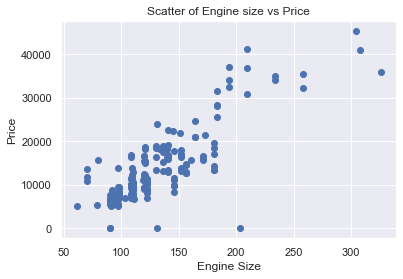

In [49]:
# Let's show the relationship between two variables in our dataset

Y = Car_data['price']
X = Car_data['engine_size']
plt.scatter(X,Y)

plt.title('Scatter of Engine size vs Price')

plt.xlabel('Engine Size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

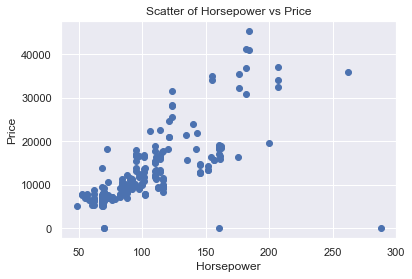

In [50]:
Y = Car_data['price']
X = Car_data['horsepower']
plt.scatter(X,Y)

plt.title('Scatter of Horsepower vs Price')

plt.xlabel('Horsepower')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

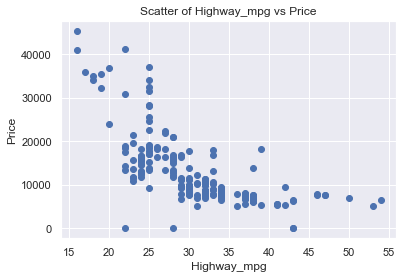

In [51]:
Y = Car_data['price']
X = Car_data['highway_mpg']
plt.scatter(X,Y)

plt.title('Scatter of Highway_mpg vs Price')

plt.xlabel('Highway_mpg')
plt.ylabel('Price')

### Correlation

### Positive Correlation
### Negative Correlation

In [52]:
correlation = Car_data.corr()

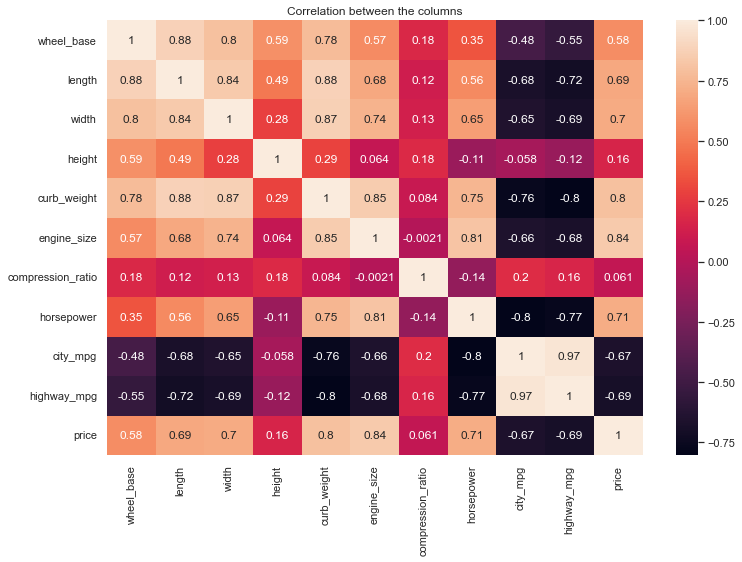

In [53]:
# Let's construct a heatmap to understand the correlation

plt.figure(figsize = (12,8))
sns.heatmap(Car_data.corr(), annot = True)
plt.title('Correlation between the columns')
plt.show()

In [54]:
# Let's get the correlation values of price

print(correlation['price'])

wheel_base           0.577310
length               0.688743
width                0.697939
height               0.156749
curb_weight          0.799902
engine_size          0.839150
compression_ratio    0.061156
horsepower           0.705061
city_mpg            -0.665784
highway_mpg         -0.691428
price                1.000000
Name: price, dtype: float64


### As seen, city_mpg and highway_mpg are negatively correlated with each other

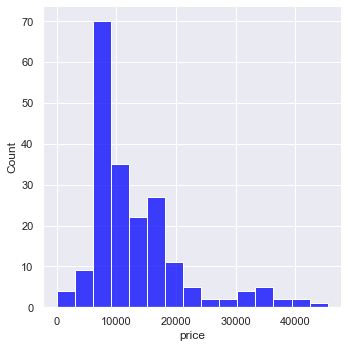

In [55]:
# Let's check the distribution of price

sns.displot(Car_data['price'], color = 'blue')

### We can see that we have more values in 10000 range

### Data Preprocessing

In [56]:
# Let's view our dataset

Car_data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495.0
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500.0
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500.0
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950.0
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450.0


### Label Encoding. The categorical values will be encoded into numerical values.

In [57]:
# Let's encode the fuel_type categorical values

Car_data.replace({'fuel_type': {'gas' :0, 'diesel' :1}}, inplace = True)

In [58]:
# Let's encode the num_of doors categorical values

Car_data.replace({'num_of_doors': {'two' :0, 'four' :1}}, inplace = True)

In [59]:
# Let's encode the body_style categorical values

Car_data.replace({'body_style' : {'sedan' :0, 'hatchback' :1, 'wagon' :2, 'hardtop' :3, 'convertible' :4,}}, inplace=True)

In [60]:
# Let's encode the drive_wheels categorical values

Car_data.replace({'drive_wheels' : {'rwd' :0, 'fwd' :1, '4wd' :2, '4wd' :3,}}, inplace=True)

In [61]:
# Let's encode the engine_location categorical values

Car_data.replace({'engine_location' : {'front' :0, 'rear' :1,}}, inplace=True)

In [62]:
# Let's encode the num_of_cylinders categorical values

Car_data.replace({'num_of_cylinders' : {'four' :0, 'six' :1, 'five' :2, 'eight' :3, 'two' :4, 'three':5,
                                       'twelve' :6, 'tow' :7}}, inplace=True)

In [63]:
# Let's encode the fuel_system categorical values

Car_data.replace({'fuel_system' : {'mpfi' :0, '2bbl' :1, 'idi' :2, '1bbl' :3, 'spdi' :4, '4bbl':5,
                                       'mfi' :6, 'spfi' :7}}, inplace=True)


In [64]:
# Let's check if the categorical values were successfully encoded

Car_data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,0,0,4,0,0,88.6,168.8,64.1,48.8,2548,dohc,0,130,0,9.0,111,21,27,13495.0
1,alfa-romero,0,0,4,0,0,88.6,168.8,64.1,48.8,2548,dohc,0,130,0,9.0,111,21,27,16500.0
2,alfa-romero,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,ohcv,1,152,0,9.0,154,19,26,16500.0
3,audi,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,ohc,0,109,0,70.0,102,24,30,13950.0
4,audi,0,1,0,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,2,136,0,8.0,115,18,22,17450.0


In [65]:
# Let's view the last five rows

Car_data.tail()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
198,volvo,0,1,0,0,0,109.1,188.8,68.9,55.5,2952,ohc,0,141,0,9.5,114,23,28,16845.0
199,volvo,0,1,0,0,0,109.1,188.8,68.8,55.5,3049,ohc,0,141,0,8.7,160,19,25,19045.0
200,volvo,0,1,0,0,0,109.1,188.8,68.9,55.5,3012,ohcv,1,173,0,8.8,134,18,23,21485.0
201,volvo,1,1,0,0,0,109.1,188.8,68.9,55.5,3217,ohc,1,145,2,23.0,106,26,27,22470.0
202,volvo,0,1,0,0,0,109.1,188.8,68.9,55.5,3062,ohc,0,141,0,9.5,114,19,25,22625.0


In [66]:
# Let's drop some columns that won't be needed

Car_data.drop('drive_wheels', axis = 1, inplace = True)

In [67]:
Car_data.drop('engine_type', axis = 1, inplace = True)

In [68]:
# Let's check if the columns were successfully dropped

Car_data.head()

,make,fuel_type,num_of_doors,body_style,engine_location,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,0,0,4,0,88.6,168.8,64.1,48.8,2548,0,130,0,9.0,111,21,27,13495.0
1,alfa-romero,0,0,4,0,88.6,168.8,64.1,48.8,2548,0,130,0,9.0,111,21,27,16500.0
2,alfa-romero,0,0,1,0,94.5,171.2,65.5,52.4,2823,1,152,0,9.0,154,19,26,16500.0
3,audi,0,1,0,0,99.8,176.6,66.2,54.3,2337,0,109,0,70.0,102,24,30,13950.0
4,audi,0,1,0,0,99.4,176.6,66.4,54.3,2824,2,136,0,8.0,115,18,22,17450.0


### Splitting the data and target

In [69]:
# We will now split the data and the target values

X = Car_data.drop(['make', 'price'], axis = 1)
Y = Car_data['price']

In [70]:
# Let's view the X values

print(X)

     fuel_type  num_of_doors  body_style  engine_location  wheel_base  length  \
0            0             0           4                0        88.6   168.8   
1            0             0           4                0        88.6   168.8   
2            0             0           1                0        94.5   171.2   
3            0             1           0                0        99.8   176.6   
4            0             1           0                0        99.4   176.6   
..         ...           ...         ...              ...         ...     ...   
198          0             1           0                0       109.1   188.8   
199          0             1           0                0       109.1   188.8   
200          0             1           0                0       109.1   188.8   
201          1             1           0                0       109.1   188.8   
202          0             1           0                0       109.1   188.8   

     width  height  curb_we

In [71]:
# Let's equally view the Y value

print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
198    16845.0
199    19045.0
200    21485.0
201    22470.0
202    22625.0
Name: price, Length: 201, dtype: float64


### Splitting Training and Test data

In [72]:
# Let's split the data into training and test train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [73]:
# let's check the shapes of x_train and x_test

print(X.shape, X_train.shape, X_test.shape)

(201, 16) (180, 16) (21, 16)


### Model Training

In [74]:
# Let's import linear regression

lin_reg_model = LinearRegression()

In [75]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [76]:
# Let's predict on the training data

training_data_prediction = lin_reg_model.predict(X_train)

In [77]:
# We will be using R squared error metircs for evaluation

error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Errror :', error_score)

R Squared Errror : 0.8184374296449328


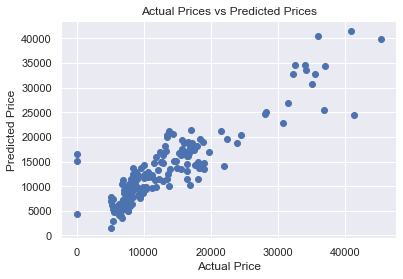

In [78]:
# Let's visualize the actual prices and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [79]:
# Let's predict on the test data

test_data_prediction = lin_reg_model.predict(X_test)

In [80]:
# We will be using R squared error metircs for evaluation

error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Errror :', error_score)

R Squared Errror : 0.660331878619842


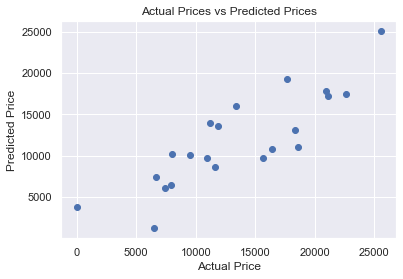

In [81]:
# Let's visualize the actual prices and predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Final notes

### Our model prediction was a good fit.